#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:**

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [ ]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score



In [ ]:
# Cargamos los datos:

drive.mount('/content/drive')
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/IAy_AA/semana_5_6/"
os.chdir(DIR)
df = pd.read_csv("SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [ ]:
old_columns = df.columns.to_list()
old_columns

['laufkont',
 'laufzeit',
 'moral',
 'verw',
 'hoehe',
 'sparkont',
 'beszeit',
 'rate',
 'famges',
 'buerge',
 'wohnzeit',
 'verm',
 'alter',
 'weitkred',
 'wohn',
 'bishkred',
 'beruf',
 'pers',
 'telef',
 'gastarb',
 'kredit']

In [ ]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************
df.rename(columns={'laufkont':'status',
'laufzeit':'duration',
'moral':'credit_history',
'verw':'purpose',
'hoehe':'amount',
'sparkont':'savings',
'beszeit':'employment_duration',
'rate':'installment_rate',
'famges':'personal_status_sex',
'buerge':'other_debtors',
'wohnzeit':'present_residence',
'verm':'property',
'alter':'age',
'weitkred':'other_installment_plans',
'wohn':'housing',
'bishkred':'number_credits',
'beruf':'job',
'pers':'people_liable',
'telef':'telephone',
'gastarb':'foreign_worker',
'kredit':'credit_risk'}, inplace = True)
# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

In [ ]:
print(df['credit_risk'].value_counts())

1    700
0    300
Name: credit_risk, dtype: int64


In [ ]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************

df['credit_risk'] = df['credit_risk'].replace({0: 1, 1: 0})

print(df['credit_risk'].value_counts())
# *********** Aquí termina la sección de agregar código *************



0    700
1    300
Name: credit_risk, dtype: int64


In [ ]:
#Reemplazar los valores numericos por variables categoricas basandome en el documento codetable.txt
status = {1:'no checking account', 2:'less than 0 DM', 3:'0 to 200 DM', 4:'200 DM or more'}
df['status'] = df['status'].map(status)

credit_history = {0 : 'delay in paying off in the past',
 1 : 'critical account/other credits elsewhere',
 2 : 'no credits taken/all credits paid back duly',
 3 : 'existing credits paid back duly till now',
 4 : 'all credits at this bank paid back duly'}
df['credit_history'] = df['credit_history'].map(credit_history)

purpose = {0 : 'others', 1 : 'car (new)', 2 : 'car (used)',3 : 'furniture/equipment', 4 : 'radio/television',
           5 : 'domestic appliances', 6 : 'repairs', 7 : 'education', 8 : 'vacation', 9 : 'retraining', 10 : 'business'}
df['purpose'] = df['purpose'].map(purpose)

savings = {1:'unknown/no savings account', 2 :'less than 100 DM', 3:'100 to 500 DM', 4 :'500 to 1000 DM', 5:'1000 DM or more'}
df['savings'] = df['savings'].map(savings)

employment_duration = {1 : 'unemployed',2 : 'less than 1 year', 3 : '1 to 4 yrs', 4 : '4 to 7 yrs', 5 : '7 yrs or more'}
df['employment_duration'] = df['employment_duration'].map(employment_duration)

installment_rate = {1 : '35 or more', 2 : '25 to 35', 3 : '20 to 25', 4 : 'less than 20'}
df['installment_rate'] = df['installment_rate'].map(installment_rate)

personal_status_sex = {1 : 'male : divorced/separated', 2 : 'female : non-single or male : single', 3 : 'male : married/widowed', 4 : 'female : single'}
df['personal_status_sex'] = df['personal_status_sex'].map(personal_status_sex)

other_debtors = {1 : 'none', 2 : 'co-applicant', 3 : 'guarantor'}
df['other_debtors'] = df['other_debtors'].map(other_debtors)

present_residence = {1 : 'less than 1 year', 2 : '1 to 4 yrs', 3 : '4 to 7 yrs', 4 : '7 yrs or more'}
df['present_residence'] = df['present_residence'].map(present_residence)

property = {1 : 'unknown/no property', 2 : 'car or other',3 : 'building soc. savings agr./life insurance', 4 : 'real estate'}
df['property'] = df['property'].map(property)

other_installment_options = {1 : 'bank',2 : 'stores',3 : 'none'}
df['other_installment_plans'] = df['other_installment_plans'].map(other_installment_options)

housing = {1:'for free', 2:'rent', 3:'own'}
df['housing'] = df['housing'].map(housing)

job={1 : 'unemployed/unskilled - non-resident',2 : 'unskilled-resident',3 : 'skilled employee/official',4 : 'manager/self-employed/highly qualified employee'}
df['job'] = df['job'].map(job)

number_credits = {1 : '1',2 : '2-3', 3 : '4-5',4 : '6 or more'}
df['number_credits'] = df['number_credits'].map(number_credits)

people_liable = {1 : '3 or more', 2 : '0 to 2'}
df['people_liable'] = df['people_liable'].map(people_liable)

telephone = {1 : 'no',2 : 'yes (under customer name)'}
df['telephone'] = df['telephone'].map(telephone)

foreign_worker = {1 : 'yes', 2 : 'no'}
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker)

## **Ejercicio 3**

In [ ]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

Xtrain, Xtv, ytrain, ytv = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],
                                            train_size=0.7,
                                            random_state=0
                                            )
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, train_size=0.5, shuffle=True,
                                            random_state=0
                                            )

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas:**

['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']



### **Variables Numéricas:**

['duration', 'amount', 'age']



En la parte de abajo indagaremos mas en los datos de las variables
### ++++++++ Termina la sección de agregar texto. +++++++++++

In [ ]:
# Se hace una lista de variables numéricas y otra de categóricas.
numerical_columns = Xtrain.select_dtypes(include=np.number).columns.tolist()
categorical_columns = Xtrain.select_dtypes(exclude=np.number).columns.tolist()

print(numerical_columns)

print(categorical_columns)

['duration', 'amount', 'age']
['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']


In [ ]:
Xtrain[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 105 to 684
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   duration  700 non-null    int64
 1   amount    700 non-null    int64
 2   age       700 non-null    int64
dtypes: int64(3)
memory usage: 21.9 KB


In [ ]:
Xtrain[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,700.0,20.895714,12.289160,4.0,12.00,18.0,24.00,72.0
amount,700.0,3311.064286,2923.865875,276.0,1363.25,2295.5,3973.75,18424.0
age,700.0,35.305714,10.971844,20.0,27.00,33.0,41.00,74.0


In [ ]:
Xtrain[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 105 to 684
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   700 non-null    object
 1   credit_history           700 non-null    object
 2   purpose                  700 non-null    object
 3   savings                  700 non-null    object
 4   employment_duration      700 non-null    object
 5   installment_rate         700 non-null    object
 6   personal_status_sex      700 non-null    object
 7   other_debtors            700 non-null    object
 8   present_residence        700 non-null    object
 9   property                 700 non-null    object
 10  other_installment_plans  700 non-null    object
 11  housing                  700 non-null    object
 12  number_credits           700 non-null    object
 13  job                      700 non-null    object
 14  people_liable            700 non-null   

In [ ]:
Xtrain[categorical_columns].describe().T

,count,unique,top,freq
status,700,4,200 DM or more,272
credit_history,700,5,no credits taken/all credits paid back duly,371
purpose,700,10,furniture/equipment,196
savings,700,5,unknown/no savings account,426
employment_duration,700,5,1 to 4 yrs,243
installment_rate,700,4,less than 20,333
personal_status_sex,700,4,male : married/widowed,395
other_debtors,700,3,none,631
present_residence,700,4,7 yrs or more,279
property,700,4,building soc. savings agr./life insurance,241


## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

In [ ]:
#Descripcion general de las variables numericas
Xtrain[numerical_columns].describe()


,duration,amount,age
count,700.000000,700.000000,700.000000
mean,20.895714,3311.064286,35.305714
std,12.289160,2923.865875,10.971844
min,4.000000,276.000000,20.000000
25%,12.000000,1363.250000,27.000000
50%,18.000000,2295.500000,33.000000
75%,24.000000,3973.750000,41.000000
max,72.000000,18424.000000,74.000000


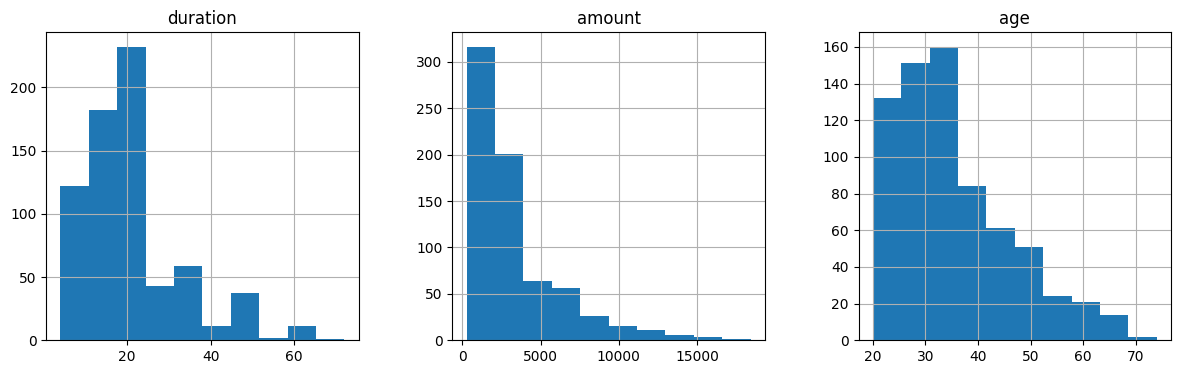

In [ ]:
#Creacion de histograma para el df
Xtrain[numerical_columns].hist(figsize=(25,4), layout=(1,5))
plt.show()

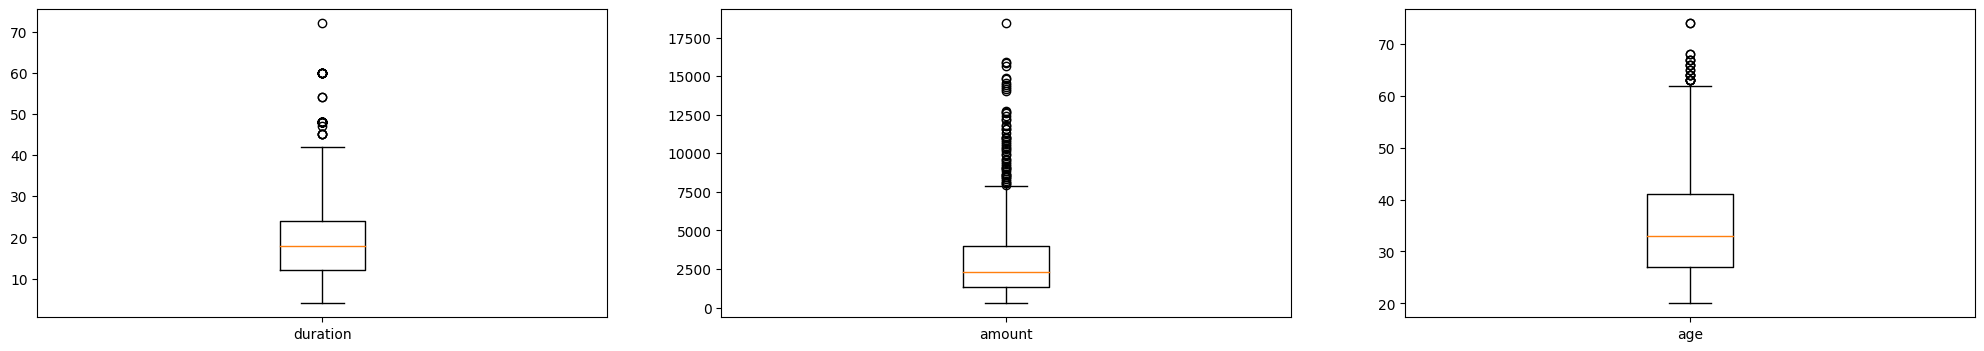

In [ ]:
#creacion de boxplot para columnas numericas
fig, axes = plt.subplots(1,3, figsize=(25,4))
axes = axes.ravel()
for col, ax in zip(Xtrain[numerical_columns], axes):
  ax.boxplot(Xtrain[col].dropna(), labels=[f'{col}'])

<Axes: xlabel='status', ylabel='count'>

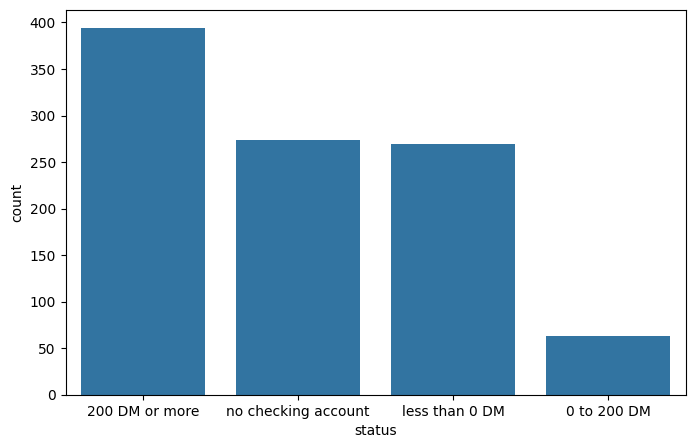

In [ ]:
# status
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='status',data=df, order=df['status'].value_counts().index)

<Axes: xlabel='credit_history', ylabel='count'>

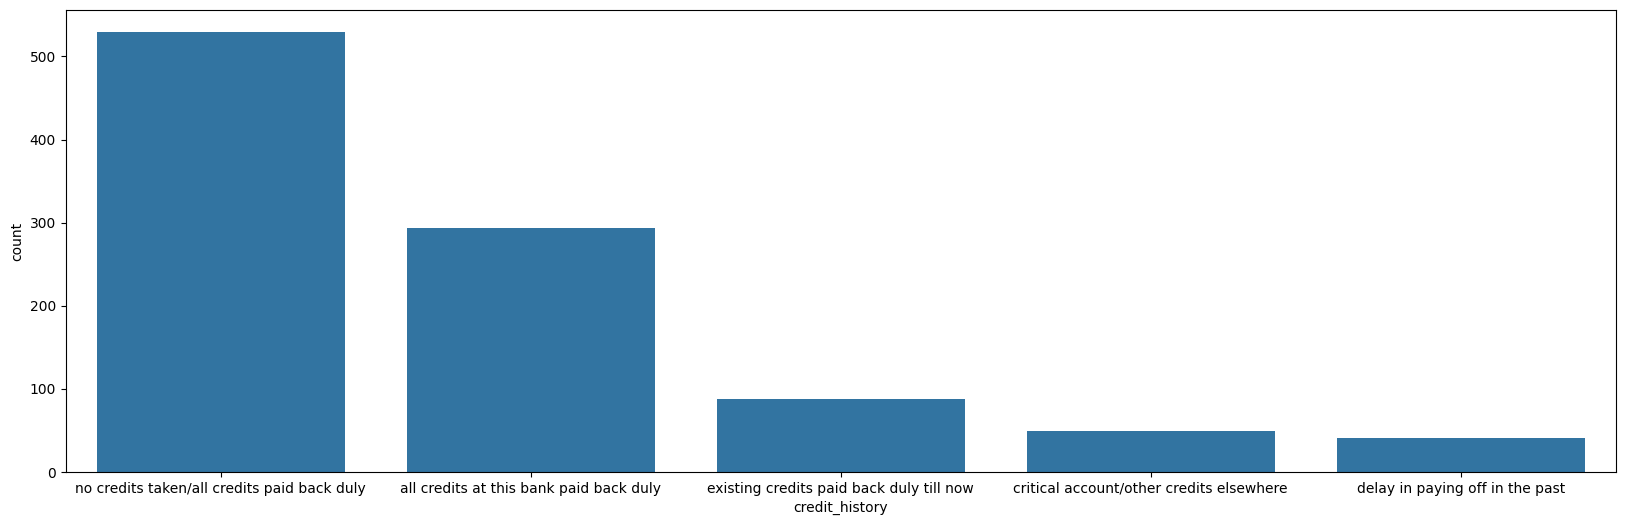

In [ ]:
# credit_history
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='credit_history', order=df['credit_history'].value_counts().index, data=df)

<Axes: xlabel='purpose', ylabel='count'>

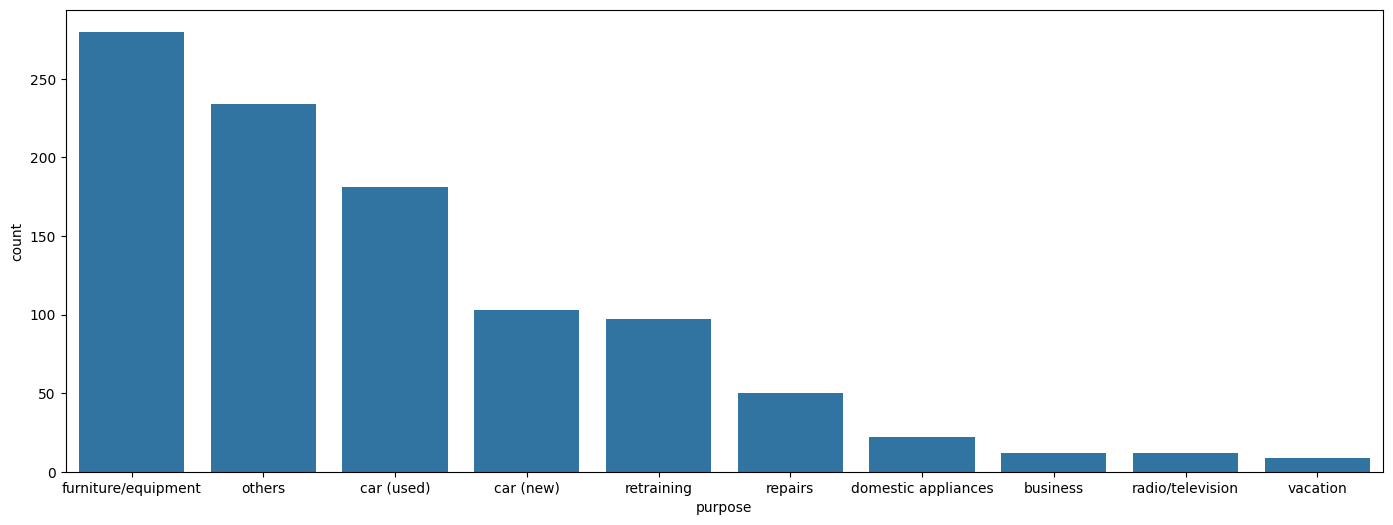

In [ ]:
# purpose
fig_dims = (17, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='purpose', order=df['purpose'].value_counts().index, data=df)

<Axes: xlabel='savings', ylabel='count'>

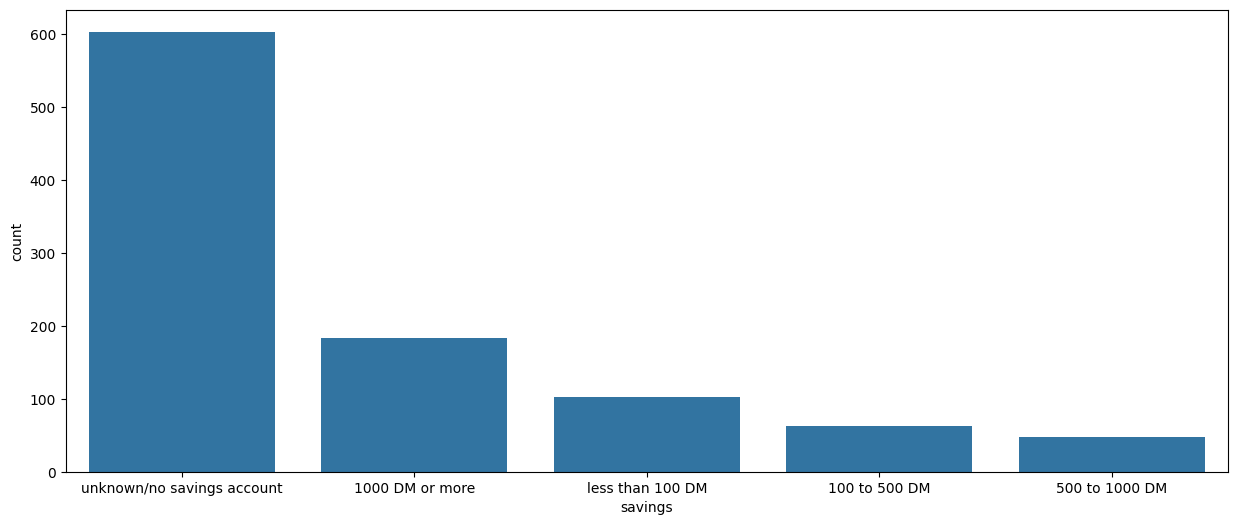

In [ ]:
# savings
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='savings', order=df['savings'].value_counts().index,data=df)

<Axes: xlabel='employment_duration', ylabel='count'>

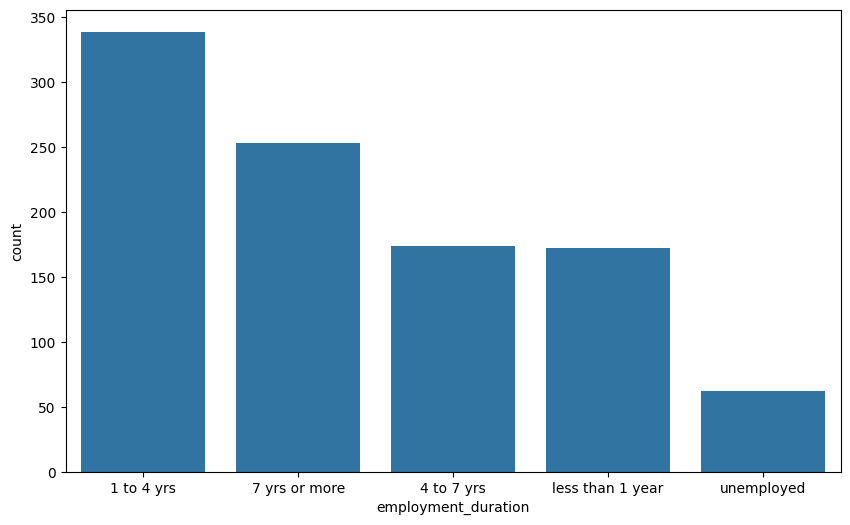

In [ ]:
# employment_duration
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='employment_duration', order=df['employment_duration'].value_counts().index,data=df)

<Axes: xlabel='installment_rate', ylabel='count'>

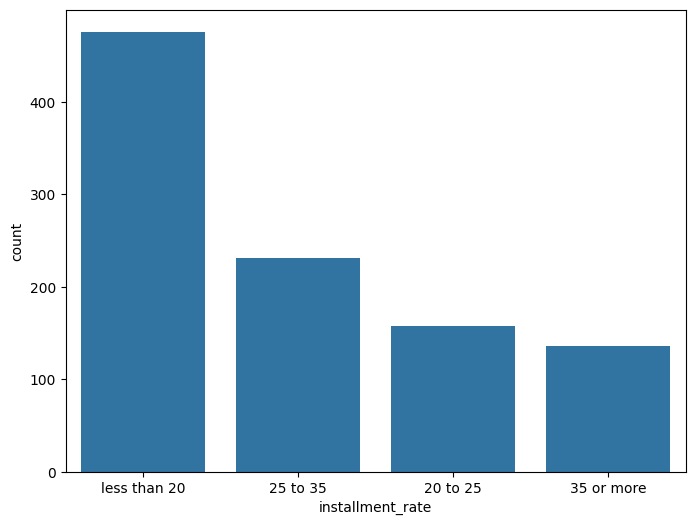

In [ ]:
# installment_rate
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='installment_rate', order=df['installment_rate'].value_counts().index, data=df)

<Axes: xlabel='personal_status_sex', ylabel='count'>

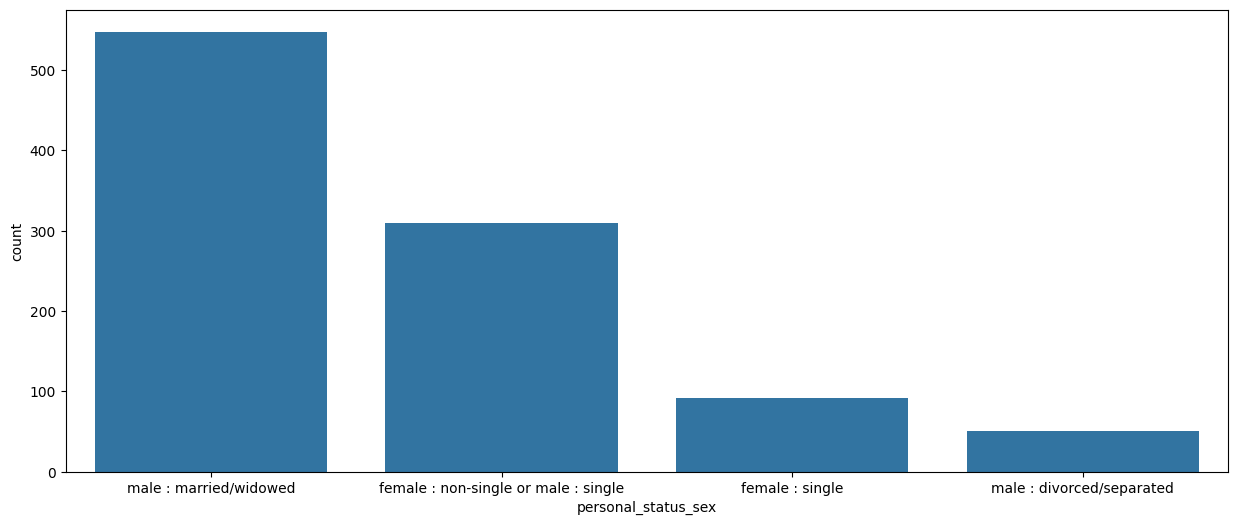

In [ ]:
# personal_status_sex
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='personal_status_sex', order=df['personal_status_sex'].value_counts().index, data=df)

<Axes: xlabel='other_debtors', ylabel='count'>

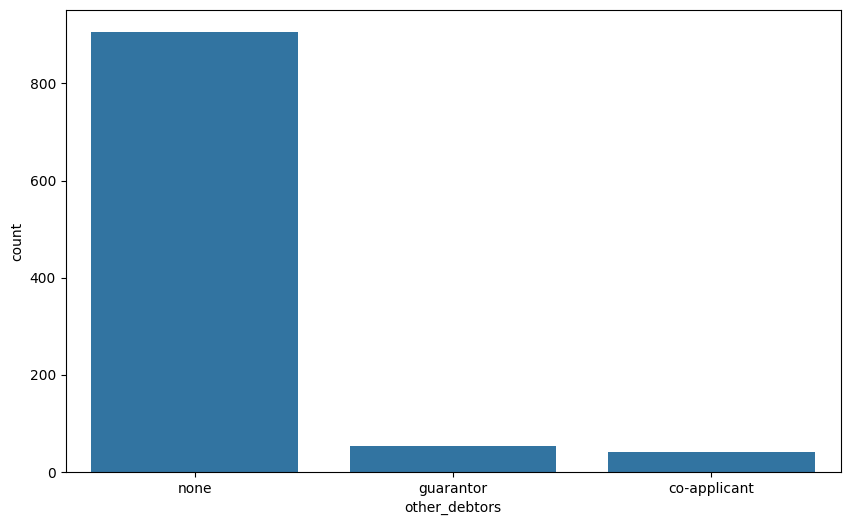

In [ ]:
# other_debtors
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='other_debtors', order=df['other_debtors'].value_counts().index, data=df)

<Axes: xlabel='present_residence', ylabel='count'>

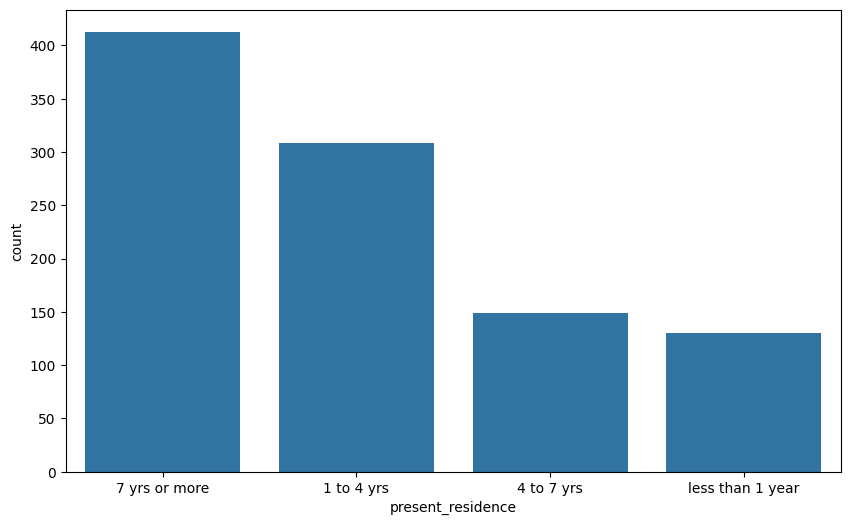

In [ ]:
# present_residence
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='present_residence', order=df['present_residence'].value_counts().index, data=df)

<Axes: xlabel='property', ylabel='count'>

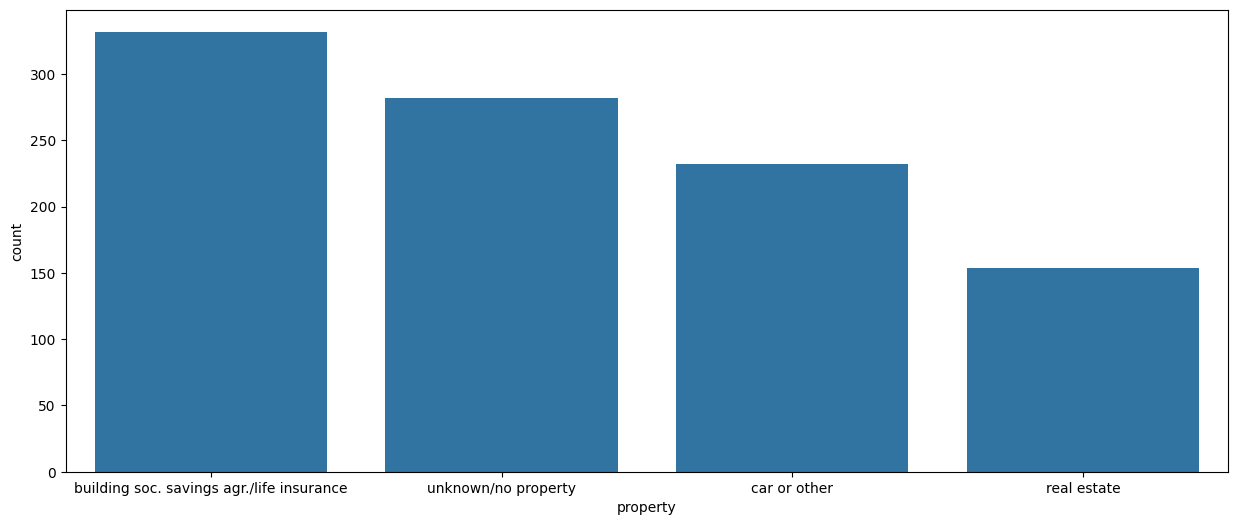

In [ ]:
# property
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='property', order=df['property'].value_counts().index, data=df)

<Axes: xlabel='other_installment_plans', ylabel='count'>

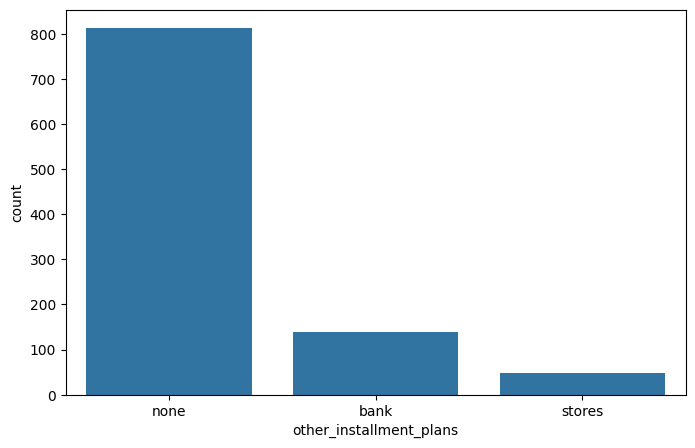

In [ ]:
# other_installment_plans
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='other_installment_plans', order=df['other_installment_plans'].value_counts().index, data=df)

<Axes: xlabel='housing', ylabel='count'>

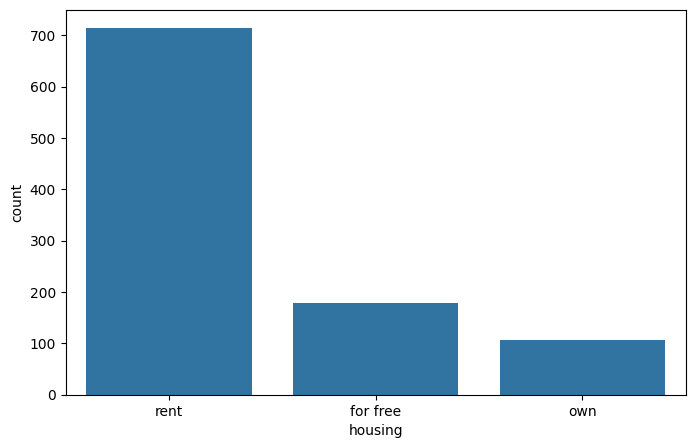

In [ ]:
# housing
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='housing', order=df['housing'].value_counts().index, data=df)

<Axes: xlabel='number_credits', ylabel='count'>

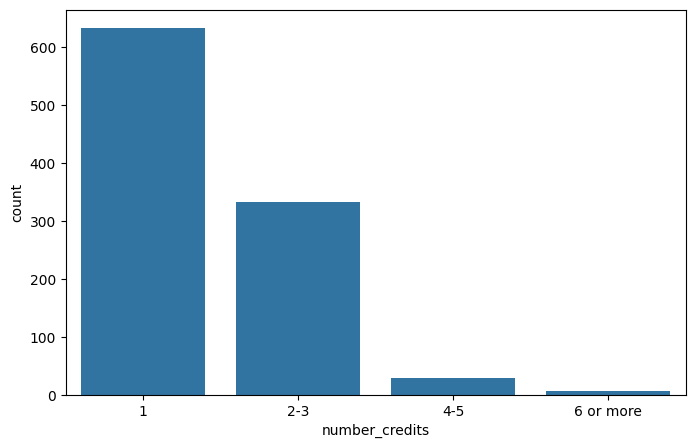

In [ ]:
# number_credits
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='number_credits', order=df['number_credits'].value_counts().index, data=df)

<Axes: xlabel='job', ylabel='count'>

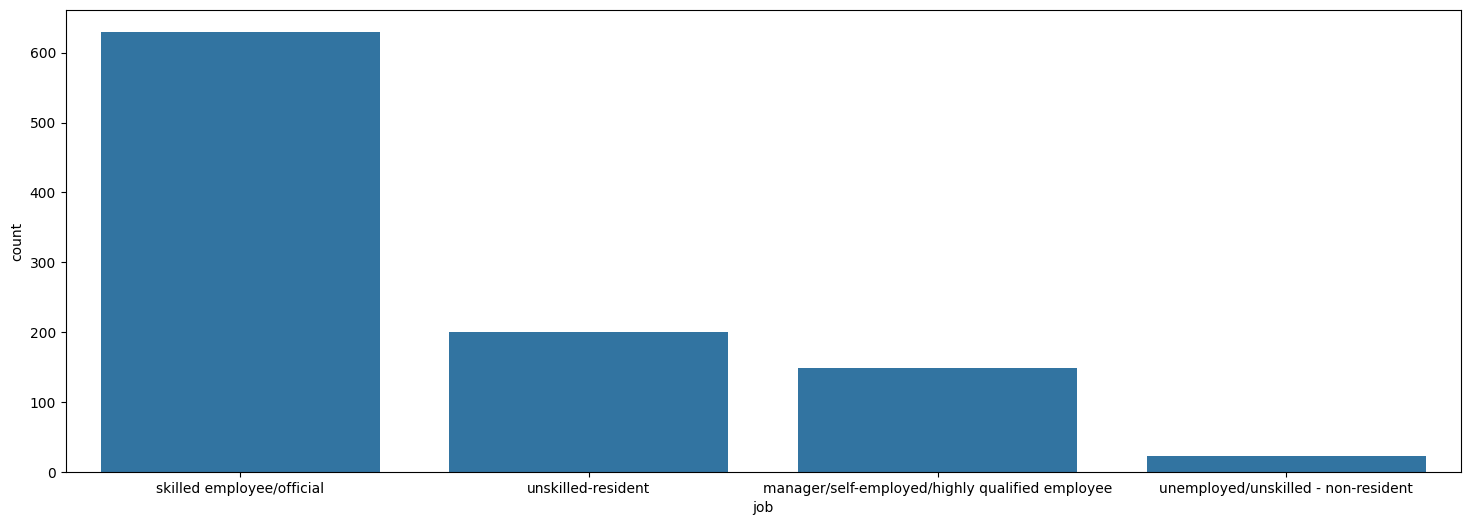

In [ ]:
# job
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='job', order=df['job'].value_counts().index, data=df)

<Axes: xlabel='people_liable', ylabel='count'>

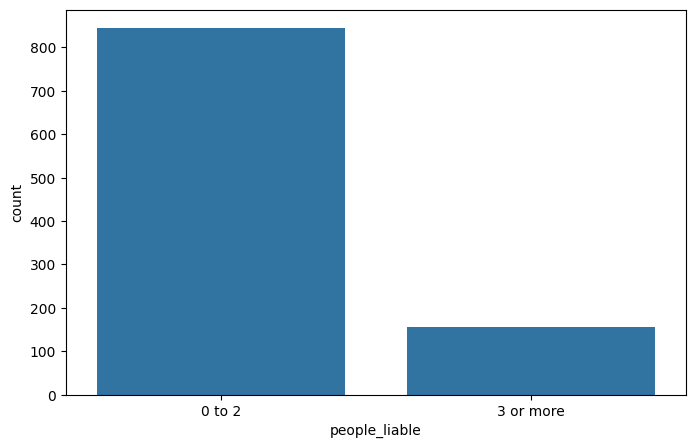

In [ ]:
# people_liable
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='people_liable', order=df['people_liable'].value_counts().index, data=df)

<Axes: xlabel='telephone', ylabel='count'>

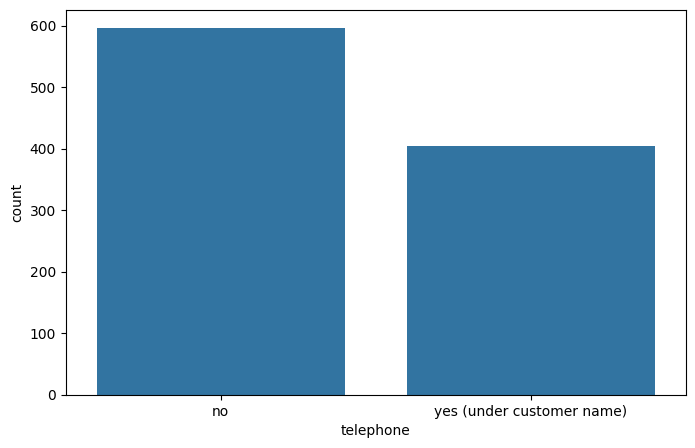

In [ ]:
# telephone
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='telephone', order=df['telephone'].value_counts().index, data=df)

<Axes: xlabel='foreign_worker', ylabel='count'>

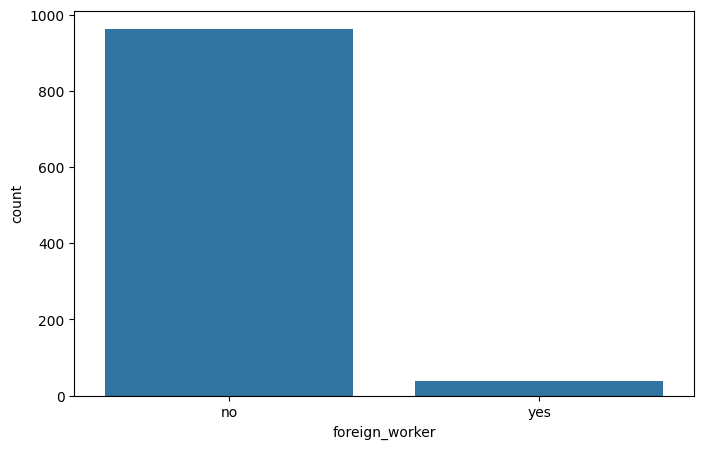

In [ ]:
# foreign_worker
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='foreign_worker', order=df['foreign_worker'].value_counts().index, data=df)


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Para las variables numericas se realizara un escalamiento robusto ya que observamos outliers en los datos.

Para las variables categoricas se realizara una codificacion ordinal


### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [ ]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
num_pipe = Pipeline(steps = [('robust', RobustScaler())
                             ])
num_pipe_nombres = numerical_columns


# Variables categóricas:
cat_pipe = Pipeline(steps = [('ordtrasnf', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))])

cat_pipe_nombres = categorical_columns


# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers = [('num_transf', num_pipe, num_pipe_nombres),
                                                        ('cat_transf', cat_pipe, cat_pipe_nombres)
                                                        ],
                                        remainder='passthrough')

# *********** Aquí termina la sección de agregar código *************




## **Ejercicio 7**

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


## **Ejercicio 8**

In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.

  # Regresión Logística:
  modelos.append(LogisticRegression(max_iter=1000,
                                    C = 0.005,
                                    random_state=1
                                    ))
  nombres.append('LR')



  # k-Vecinos Más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors = 5
                                      ))
  nombres.append('kNN')



  # Árbol de Decisión:
  modelos.append(DecisionTreeClassifier(max_depth = None,
                                        min_samples_leaf=1,
                                        random_state=7
                                        ))
  nombres.append('DTree')



  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators= 100,
                                        max_depth= None,
                                        min_samples_split=5
                                        ))
  nombres.append('RF')




  # XGBoost:

  modelos.append(XGBClassifier(booster= 'gbtree',
                               n_estimators=100,
                               max_depth= 6,
                               learning_rate=0.3,
                               subsample=1.0,
                               objective='binary:logistic'
                               n_jobs=-1))
  nombres.append('XGBoost')




  # Red Neuronal Artificial: Perceptrón MultiCapa:
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,),
                               activation='logistic',
                               max_iter=1000,
                               alpha=0.0001
                               ))
  nombres.append('MLP')



  # Máquina de Vector Soporte : Support Vector Machine
  modelos.append(SVC(kernel='rbf',
                     C= 1.0,
                     gamma= 'scale',
                     class_weight='balanced'
                     ))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres






# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_f1 0.150 (0.049)
	 train_f1 0.164 (0.024)
	 test_recall 0.084 (0.032)
	 train_recall 0.091 (0.015)
	 test_roc_auc 0.743 (0.020)
	 train_roc_auc 0.767 (0.005)
	 test_accuracy 0.733 (0.007)
	 train_accuracy 0.736 (0.004)
	 test_precision 0.854 (0.151)
	 train_precision 0.856 (0.035)
>> kNN
	 test_f1 0.343 (0.053)
	 train_f1 0.526 (0.017)
	 test_recall 0.268 (0.050)
	 train_recall 0.418 (0.018)
	 test_roc_auc 0.645 (0.035)
	 train_roc_auc 0.841 (0.005)
	 test_accuracy 0.709 (0.019)
	 train_accuracy 0.784 (0.007)
	 test_precision 0.486 (0.061)
	 train_precision 0.707 (0.024)
>> DTree
	 test_f1 0.453 (0.083)
	 train_f1 1.000 (0.000)
	 test_recall 0.461 (0.104)
	 train_recall 1.000 (0.000)
	 test_roc_auc 0.618 (0.055)
	 train_roc_auc 1.000 (0.000)
	 test_accuracy 0.686 (0.041)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.450 (0.070)
	 train_precision 1.000 (0.000)
>> RF
	 test_f1 0.428 (0.065)
	 train_f1 0.972 (0.007)
	 test_recall 0.318 (0.066)
	 train_recall 0.948 (0.014)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

>> MLP
	 test_f1 0.478 (0.060)
	 train_f1 0.657 (0.019)
	 test_recall 0.415 (0.066)
	 train_recall 0.570 (0.029)
	 test_roc_auc 0.735 (0.036)
	 train_roc_auc 0.887 (0.011)
	 test_accuracy 0.742 (0.025)
	 train_accuracy 0.830 (0.006)
	 test_precision 0.569 (0.065)
	 train_precision 0.776 (0.009)
>> SVM
	 test_f1 0.564 (0.049)
	 train_f1 0.661 (0.010)
	 test_recall 0.654 (0.081)
	 train_recall 0.762 (0.017)
	 test_roc_auc 0.750 (0.037)
	 train_roc_auc 0.854 (0.007)
	 test_accuracy 0.712 (0.031)
	 train_accuracy 0.777 (0.008)
	 test_precision 0.498 (0.041)
	 train_precision 0.584 (0.013)


## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.
Considero que seria mas costoso un FN ya que predecir incorrectamente que un cliente es bueno para el crédito cuando en realidad no lo es significaria una pérdida financiera por incumplimiento del cliente, esto ya que inicialmente se cambiaron las metricas de los clientes.

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

Especificidad:
Si el banco quiere minimizar los casos de "malos clientes" que son aprobados erróneamente, priorizaría Especificidad. Esto ayuda a garantizar que los clientes identificados como buenos pagadores realmente lo sean.

Precisión:
Si el banco busca maximizar la precisión de las aprobaciones de crédito y está más preocupado por evitar otorgar créditos a clientes de alto riesgo, priorizaría la Precisión.

Exactitud:
Consideración: La exactitud es importante, pero en casos de desbalance de clases, puede no ser la métrica más informativa, ya que puede ser alta incluso si hay un buen rendimiento solo en la clase mayoritaria.

c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

F1 Score: La media armónica de Precision y Recall, útil cuando hay desbalance entre clases.

Especificidad (Tasa de Verdaderos Negativos): La proporción de verdaderos negativos sobre el total de casos negativos reales.

Área bajo la Curva ROC (AUC-ROC): Representa la capacidad del modelo para distinguir entre clases. Cuanto mayor, mejor.

Índice de Youden: La suma de Sensibilidad y Especificidad menos uno. Ayuda a encontrar el mejor equilibrio entre Sensibilidad y Especificidad.

Log Loss (Pérdida Logarítmica): Evalúa la probabilidad asociada con las predicciones. Menor log loss es mejor.

Cohen's Kappa: Mide la concordancia entre las predicciones del modelo y las clases reales, teniendo en cuenta la probabilidad del acuerdo por azar.

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

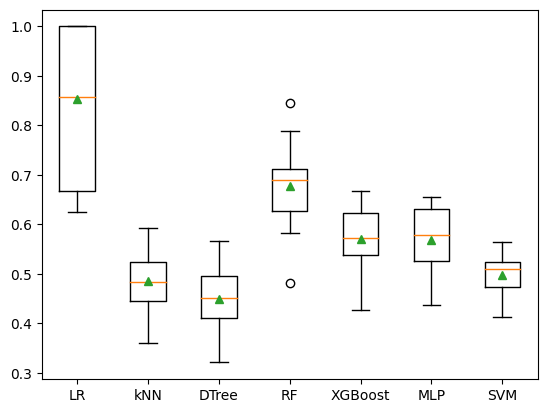

In [ ]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

tmp = [resultados[j]['test_precision'] for j in range(len(resultados)) ]

plt.boxplot(tmp, labels=nombres, showmeans=True)
plt.show()

# *********** Aquí termina la sección de agregar código *************


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [ ]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

def mis_modelos():
  modelos, nombres = list(), list()


  # Árbol de Decisión con Sobremuestreo:
  modelos.append(ImbPipeline([
      ('oversampler', RandomOverSampler(sampling_strategy='minority')),
      ('classifier', DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=7))
  ]))
  nombres.append('DTree_Oversampled')

  # Bosque Aleatorio con Sobremuestreo:
  modelos.append(ImbPipeline([
      ('oversampler', RandomOverSampler(sampling_strategy='minority')),
      ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=5))
  ]))
  nombres.append('RF_Oversampled')

  # XGBoost con Sobremuestreo:
  modelos.append(ImbPipeline([
      ('oversampler', RandomOverSampler(sampling_strategy='minority')),
      ('classifier', XGBClassifier(booster='gbtree', n_estimators=100, max_depth=6, learning_rate=0.3,
                                    subsample=1.0, objective='binary:logistic', n_jobs=-1))
  ]))
  nombres.append('XGBoost_Oversampled')

#SVM con Sobremuestreo
  modelos.append(ImbPipeline([
      ('oversampler', RandomOverSampler(sampling_strategy='minority')),
      ('classifier', SVC(kernel='rbf',
                     C= 1.0,
                     gamma= 'scale',
                     class_weight='balanced'
                     ))
  ]))
  nombres.append('SVM_Undersampled')


  return modelos, nombres


modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))


# *********** Aquí termina la sección de agregar código *************

>> DTree_Oversampled
	 test_f1 0.446 (0.061)
	 train_f1 1.000 (0.000)
	 test_recall 0.452 (0.079)
	 train_recall 1.000 (0.000)
	 test_roc_auc 0.613 (0.041)
	 train_roc_auc 1.000 (0.000)
	 test_accuracy 0.682 (0.030)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.443 (0.055)
	 train_precision 1.000 (0.000)
>> RF_Oversampled
	 test_f1 0.525 (0.053)
	 train_f1 0.994 (0.003)
	 test_recall 0.472 (0.073)
	 train_recall 0.991 (0.006)
	 test_roc_auc 0.769 (0.037)
	 train_roc_auc 1.000 (0.000)
	 test_accuracy 0.758 (0.023)
	 train_accuracy 0.996 (0.002)
	 test_precision 0.601 (0.058)
	 train_precision 0.997 (0.004)
>> XGBoost_Oversampled
	 test_f1 0.518 (0.065)
	 train_f1 1.000 (0.000)
	 test_recall 0.479 (0.083)
	 train_recall 1.000 (0.000)
	 test_roc_auc 0.763 (0.026)
	 train_roc_auc 1.000 (0.000)
	 test_accuracy 0.748 (0.026)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.572 (0.059)
	 train_precision 1.000 (0.000)
>> SVM_Undersampled
	 test_f1 0.571 (0.057)
	 train_f1 0.676 (0.019)
	 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

def mis_modelos():
  modelos, nombres = list(), list()


  # Árbol de Decisión con Submuestreo:
  modelos.append(ImbPipeline([
      ('undersampler', RandomUnderSampler(sampling_strategy='majority')),
      ('classifier', DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=7))
  ]))
  nombres.append('DTree_Undersampled')

  # Bosque Aleatorio con Submuestreo:
  modelos.append(ImbPipeline([
      ('undersampler', RandomUnderSampler(sampling_strategy='majority')),
      ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=5))
  ]))
  nombres.append('RF_Undersampled')

  # XGBoost con Submuestreo:
  modelos.append(ImbPipeline([
      ('undersampler', RandomUnderSampler(sampling_strategy='majority')),
      ('classifier', XGBClassifier(booster='gbtree', n_estimators=100, max_depth=6, learning_rate=0.3,
                                    subsample=1.0, objective='binary:logistic', n_jobs=-1))
  ]))
  nombres.append('XGBoost_Undersampled')

  # XGBoost con Submuestreo:
  modelos.append(ImbPipeline([
      ('oversampler', RandomOverSampler(sampling_strategy='minority')),
      ('classifier', SVC(kernel='rbf',
                     C= 1.0,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     class_weight='balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     #random_state=7
                     ))
  ]))
  nombres.append('SVM__Undersampled')

  return modelos, nombres


modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))


>> DTree_Undersampled
	 test_f1 0.485 (0.030)
	 train_f1 0.774 (0.015)
	 test_recall 0.630 (0.063)
	 train_recall 1.000 (0.000)
	 test_roc_auc 0.622 (0.026)
	 train_roc_auc 0.883 (0.010)
	 test_accuracy 0.619 (0.028)
	 train_accuracy 0.833 (0.015)
	 test_precision 0.397 (0.025)
	 train_precision 0.632 (0.021)
>> RF_Undersampled
	 test_f1 0.559 (0.050)
	 train_f1 0.808 (0.018)
	 test_recall 0.686 (0.068)
	 train_recall 0.993 (0.004)
	 test_roc_auc 0.758 (0.037)
	 train_roc_auc 0.974 (0.005)
	 test_accuracy 0.690 (0.041)
	 train_accuracy 0.864 (0.016)
	 test_precision 0.474 (0.049)
	 train_precision 0.681 (0.025)
>> XGBoost_Undersampled
	 test_f1 0.546 (0.044)
	 train_f1 0.809 (0.013)
	 test_recall 0.674 (0.057)
	 train_recall 1.000 (0.000)
	 test_roc_auc 0.742 (0.036)
	 train_roc_auc 0.970 (0.007)
	 test_accuracy 0.679 (0.037)
	 train_accuracy 0.865 (0.012)
	 test_precision 0.461 (0.045)
	 train_precision 0.680 (0.019)
>> SVM__Undersampled
	 test_f1 0.575 (0.046)
	 train_f1 0.680 (0.012

# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Considero que la metrica mas importante es la precision y despues de todo el proceso el modelo que me trae una mejor presicion es la SVG con un 80% sobre la clase negativa

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [ ]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
#se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.


# ************* Inlcuye aquí tu código:**************************

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# Crea el modelo SVC
modelo_svc = SVC(random_state=7)

# Crea el pipeline con el transformador y el modelo
pipeline = Pipeline([
    ('transformador', columnasTransformer),
    ('svc', modelo_svc)
])

# Define los parámetros para la búsqueda en cuadrícula
param_grid = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__class_weight': [None, 'balanced']
}

# Configura GridSearchCV con el pipeline, los parámetros y la métrica que deseas optimizar
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Ajusta el modelo a los datos
grid_search.fit(Xtrainval, ytrainval)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

# Obtiene el mejor modelo
best_model = grid_search.best_estimator_

# Imprime los mejores hiperparámetros
print("Mejores Hiperparámetros:", best_params)




# *********** Aquí termina la sección de agregar código *************


Mejores Hiperparámetros: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


## **Ejercicio 14**

In [ ]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.


# ************* Inlcuye aquí tu código:**************************
yhat_best = best_model.predict(Xtest)

print(classification_report(ytest, yhat_best))
print('Métrica-ROC-Test:', np.round(roc_auc_score(ytest, yhat_best), 2))

# *********** Aquí termina la sección de agregar código *************


              precision    recall  f1-score   support

           0       0.81      0.75      0.78        93
           1       0.64      0.72      0.68        57

    accuracy                           0.74       150
   macro avg       0.73      0.74      0.73       150
weighted avg       0.75      0.74      0.74       150

Métrica-ROC-Test: 0.74


In [ ]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************

from sklearn.metrics import confusion_matrix

# Obtén la matriz de confusión para el conjunto de prueba
matriz_confusion = confusion_matrix(ytest, yhat_best)

# Imprime la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)

# *********** Aquí termina la sección de agregar código *************

Matriz de Confusión:
[[70 23]
 [16 41]]


In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

from sklearn.inspection import permutation_importance

# Calcula la importancia de las variables mediante permutación
resultados_permutacion = permutation_importance(best_model, Xtest, ytest, n_repeats=10, random_state=0)

# Obtén la importancia promedio de las variables
importancia_variables = resultados_permutacion.importances_mean

# Crea un DataFrame para visualizar las importancias de las variables
import pandas as pd
df_importancia = pd.DataFrame({'Variable': Xtest.columns, 'Importancia': importancia_variables})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Imprime el DataFrame con la importancia de las variables
print("Importancia de Variables:")
print(df_importancia)


# *********** Aquí termina la sección de agregar código *************


Importancia de Variables:
                   Variable  Importancia
0                    status     0.096000
5                   savings     0.037333
1                  duration     0.028667
4                    amount     0.023333
13  other_installment_plans     0.022000
11                 property     0.018000
3                   purpose     0.012667
12                      age     0.009333
15           number_credits     0.007333
14                  housing     0.007333
6       employment_duration     0.005333
10        present_residence     0.005333
8       personal_status_sex     0.004667
2            credit_history     0.004667
18                telephone     0.002667
7          installment_rate     0.002667
9             other_debtors     0.001333
17            people_liable     0.000667
19           foreign_worker     0.000000
16                      job    -0.002000


## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++


El proceso de creación y evaluación de modelos que se ha llevado a cabo es fundamental en la construcción de soluciones de aprendizaje automático.

Se han explorado varios modelos, desde regresión logística hasta máquinas de soporte vectorial y redes neuronales. Esta diversidad fue clave para entender qué enfoques funcionan mejor para tu conjunto de datos, una vez seleccionando el mejor modelo se ha  realizado una búsqueda de hiperparámetros utilizando GridSearchCV, lo cual fue de gran ayuda para encontrar la combinación óptima de parámetros para el mejor modelo.

La validación cruzada y las métricas de evaluación, como precisión, recall, F1-score y ROC-AUC fueron muy utiles para evaluar el rendimiento de los modelos de manera más robusta. Esto proporciona una estimación más confiable del rendimiento en comparación con un único conjunto de entrenamiento/prueba. La experimentación continua y la optimización podrían ser parte de los siguientes pasos para perfeccionar aún más tus modelos y abordar desafíos específicos que puedan surgir en futuros conjuntos de datos.

### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**